['/Users/junginhong/mindslab/test0.jpeg', '/Users/junginhong/mindslab/test1.jpeg', '/Users/junginhong/mindslab/test2.jpeg', '/Users/junginhong/mindslab/test3.jpeg']
here


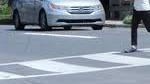

here


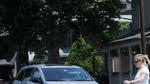

here


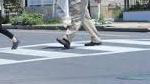

here


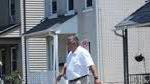

0 0 0
1 150 0
2 0 84
3 150 84


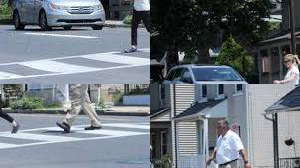

In [1]:
# merge_image.py ${input_filename_prefix} ${column_num} ${row_num} ${output_filename}
# merge_image.p test 2 2 merged


import os
import glob
from PIL import Image

#input_filename_prefix = 'test'
#column_num, row_num = (2, 2)
#output_filename = 'merged.jpeg'

image_file_name, column_num, row_num, prefix_output_filename = list((sys.argv))[1:]
column_num, row_num = int(column_num), int(row_num)
output_filename = prefix_output_filename +'.jpeg'
print(image_file_name, column_num, row_num, output_filename)


# + does not work [0-9][0-9]* does not work

#print(glob.glob(f'{input_filename_prefix}[0-9]+.jpeg'))

height, width = 84, 150
'''fix: how to get width and height out here'''
new_im = Image.new('RGB', (width*column_num, height*row_num))


imagelist = glob.glob(f'/Users/junginhong/mindslab/{input_filename_prefix}[0-9]*.jpeg')
#print(imagelist)
y_offset = 0
count = 0

'''
for i in imagelist:
    im=Image.open(i)
    print('here')
    display(im)
'''
for r in range(row_num):

    x_offset = 0
    
    for c in range(column_num):
        print(count, x_offset, y_offset)
        im=Image.open(imagelist[count])
        new_im.paste(im, (x_offset, y_offset))
        x_offset += im.size[0]
        count += 1
    y_offset += im.size[1]
new_im.save(output_filename)
    
#display(new_im) 
#os.listdir()




In [111]:
from scipy.spatial import distance
processed_imagelist = []

i = imagelist[0]

while sorted(processed_imagelist) != sorted(imagelist):

    im=Image.open(i)
    np_im = np.asarray(im)
    #top = np_im[[0], :, :]
    #bottom = np_im[[-1], :, :]
    #left = np_im[:, [0], :]
    #right = np_im[:, [-1], :]
    top = np_im[0, :, 0]
    bottom = np_im[-1, :, 0]
    left = np_im[:, 0, 0]
    right = np_im[:, -1, 0]
    #print(top.shape, bottom.shape, left.shape, right.shape)
    targets = [top, bottom, left, right]
    
    min_list = []
    """한 이미지의 각 변에 대해"""
    for target in targets:
        #print('for each edges')
        min_dist = 1000
        matched = ()
        '''모든 다른 이미지와 비교'''
        for nested in imagelist:
            #print('check each images')
            vectors = []
            indexes = []
            if i == nested:
                #print(i, nested)
                continue
                
            if i in processed_imagelist:
                continue
            
            '''각 이미지의 변 추출, 그리고 변 반전'''
            else:
                comp_im = Image.open(nested)
                comp_im = np.asarray(comp_im)
                comp_top = comp_im[0, :, 0]
                comp_bottom = comp_im[-1, :, 0]
                comp_left = comp_im[:, 0, 0]
                comp_right = comp_im[:, -1, 0]
                edges = [comp_top, comp_bottom, comp_left, comp_right, 
                         np.flip(comp_top), np.flip(comp_bottom), np.flip(comp_left), np.flip(comp_right)]
                
                
                for e in range(len(edges)):
                    if target.shape == edges[e].shape:
                        vectors.append(edges[e])
                        indexes.append(e)
                #print(e, len(vectors))
            
            '''코사인 거리 구함'''
            for v in vectors:
                distances = distance.cdist([target], vectors, "cosine")[0]
                #print(len(distances))
                min_index = np.argmin(distances)
                min_distance = distances[min_index]
                if min_distance < min_dist:
                    min_dist = min_distance
                    matched = nested, indexes[min_index]
                #print(nested, indexes[min_index], min_distance)
        min_list.append((matched, min_dist))
        key += 1
    #print(min_list)
    next_im = min(min_list, key = lambda t: t[1])#[0][0]
    #print(next_im)
    #break
    processed_imagelist.append(i)
    i = next_im[0][0]

    
#문제점 가장 적은 거리가 항상 알맞는 마주보는 변이 아님

BIGGG /Users/junginhong/mindslab/test0.jpeg
(150,) (150,) (84,) (84,)
for each edges
check each images
check each images
check each images
check each images
for each edges
check each images
check each images
check each images
check each images
for each edges
check each images
check each images
check each images
check each images
for each edges
check each images
check each images
check each images
check each images
[(('/Users/junginhong/mindslab/test1.jpeg', 0), 0.24766813374832863), (('/Users/junginhong/mindslab/test2.jpeg', 0), 0.01769511830150161), (('/Users/junginhong/mindslab/test1.jpeg', 2), 0.20142738449589281), (('/Users/junginhong/mindslab/test1.jpeg', 2), 0.10959817771244251)]
(('/Users/junginhong/mindslab/test2.jpeg', 0), 0.01769511830150161)
BIGGG /Users/junginhong/mindslab/test2.jpeg
(150,) (150,) (84,) (84,)
for each edges
check each images
check each images
check each images
check each images
for each edges
check each images
check each images
check each images
check each 

IndexError: tuple index out of range

In [3]:
#python3 -m pip install tensorflow-macos
# --> ERROR: Could not build wheels for h5py, which is required to install pyproject.toml-based projects
from tensorflow.keras import layers

#layer = layers.Dense(32, activation='relu')
#inputs = tf.random.uniform(shape=(10, 20))
#outputs = layer(inputs)
contents = imagelist[0]

inputs = tf.image.decode_jpeg(contents, channels=3)

model = keras.models.Sequential()

model.add(td(ZeroPadding2D(2), input_shape=(4,100,100,3)))  # extra padding

model.add(td(Conv2D(50, kernel_size=(5,5), padding='same', activation='relu', strides=2))) # padding=same for more padding
model.add(td(BatchNormalization()))
model.add(td(MaxPooling2D()))                                                              # only one maxpool layer

model.add(td(Conv2D(100, kernel_size=(5,5), padding='same', activation='relu', strides=2)))
model.add(td(BatchNormalization()))
model.add(td(Dropout(0.3)))

model.add(td(Conv2D(100, kernel_size=(3,3), padding='same', activation='relu', strides=2)))
model.add(td(BatchNormalization()))
model.add(td(Dropout(0.3)))

model.add(td(Conv2D(200, kernel_size=(3,3), padding='same', activation='relu', strides=1)))
model.add(td(BatchNormalization()))
model.add(td(Dropout(0.3)))

model.add(Flatten())  # combining all the features

model.add(Dense(600, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Reshape((4, 4)))        # reshaping the final output
model.add(Activation('softmax'))  # softmax would be applied row wise


#outputs = model(inputs)

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
import numpy